In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

csv_data = os.path.join(".","Border_Crossing_Entry_Data.csv")

border_df = pd.read_csv(csv_data)

border_df['Date'] = pd.to_datetime(border_df['Date'].str.strip(), errors='coerce')

#Drop any NAs
border_df = border_df.dropna(subset=['Date'])

#extract the 'year'
border_df['Year'] = border_df['Date'].dt.year

#remove any zeros
border_df = border_df.dropna(subset = ['Value'])
border_df = border_df[border_df['Value'] > 0]

#group by year and port
annual_data = border_df.groupby(['Year'], as_index=False)['Value'].sum()

annual_data

,Year,Value
0,1996,429790351
1,1997,494174198
2,1998,508588404
3,1999,538456724
4,2000,540021542
5,2001,493083902
6,2002,475702818
7,2003,456392653
8,2004,458220298
9,2005,450234268


In [3]:
#Sort the data
annual_data = annual_data.sort_values(by=['Year'])

#create a column for change from year to year
annual_data['Annual Change'] = annual_data['Value'].pct_change()

# Set the first year's Annual Change to 0
annual_data['Annual Change'].iloc[0] = 0

# Convert 'Annual Change' to percentage 
annual_data['Annual Change'] = annual_data['Annual Change'] * 100

#create column which can be used to predict increase or decrease
annual_data['Increase'] = (annual_data['Annual Change'] > 0).astype(int)

# format the 'Annual Change' to display as percentage 
annual_data['Annual Change'] = annual_data['Annual Change'].map('{:.2f}%'.format)

annual_data

C:\Users\mhennessy\AppData\Local\Temp\ipykernel_27572\2235031961.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  annual_data['Annual Change'].iloc[0] = 0
C:\Users\mhennessy\AppData\Local\Temp\ipykernel_27572\2235031961.py:8: SettingWithC

,Year,Value,Annual Change,Increase
0,1996,429790351,0.00%,0
1,1997,494174198,14.98%,1
2,1998,508588404,2.92%,1
3,1999,538456724,5.87%,1
4,2000,540021542,0.29%,1
5,2001,493083902,-8.69%,0
6,2002,475702818,-3.52%,0
7,2003,456392653,-4.06%,0
8,2004,458220298,0.40%,1
9,2005,450234268,-1.74%,0


In [4]:
# Select features and target
X = annual_data['Year'].values.reshape(-1, 1)
y = annual_data['Increase']

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create, fit, and predict model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_converted = (y_pred > 0.5).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_converted)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_converted))

Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

#create, fit, and predict model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_converted = (y_pred > 0.5).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_converted)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_converted))

Accuracy: 0.5926

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.60      0.64      0.62        14

    accuracy                           0.59        27
   macro avg       0.59      0.59      0.59        27
weighted avg       0.59      0.59      0.59        27



In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

#create, fit, and predict model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_converted = (y_pred > 0.5).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_converted)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_converted))

Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.75      0.64      0.69        14

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.66        24
weighted avg       0.68      0.67      0.67        24



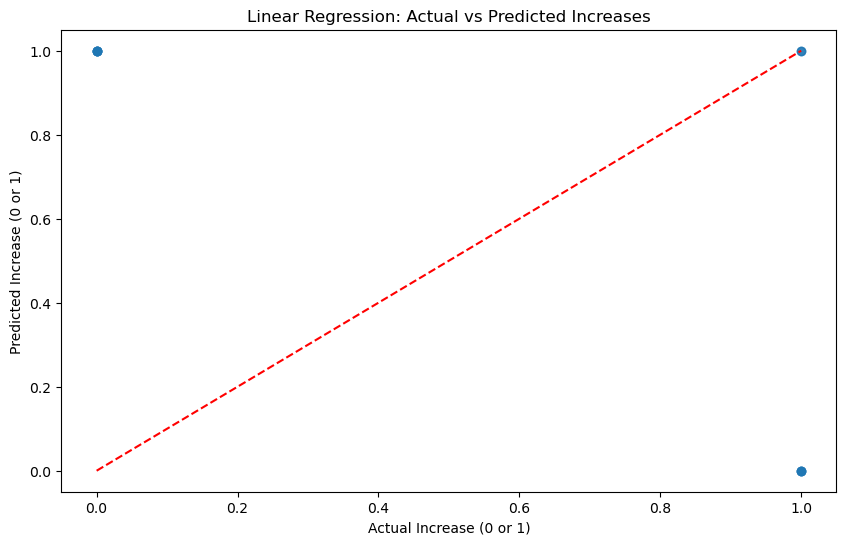

In [14]:
# Plot the model's predictions vs. actual outcomes
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_converted, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Increase (0 or 1)')
plt.ylabel('Predicted Increase (0 or 1)')
plt.title('Linear Regression: Actual vs Predicted Increases')
plt.show()